# Clustering Assignment 3

Mall_Customer 데이터 clustering을 하시오.

# Data

기본적으로 데이터를 불러오고 분석에 사용할 package들을 설정해야 한다.

In [152]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# 가장 기본적인 것부터 import하고 차후 필요한 package들은 차차 더하기로 한다.
# 그래프를 그릴 때, 경고가 많이 뜨므로 import 하기로 하자

In [153]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


CustomerID 같은 경우, 의미가 없는 데이터이므로 데이터프레임에서 삭제해준다.

In [154]:
df = df.drop('CustomerID', axis = 1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


Gender는 범주형 데이터이므로 get_dummies를 통해 0과 1로 변환한다.

In [155]:
df["Gender"]=pd.get_dummies(df["Gender"])
df

# male = 0, female = 1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


간단하게 데이터를 훑어본다.

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    uint8
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3), uint8(1)
memory usage: 5.0 KB


In [157]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [158]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


결측치는 존재하지 않지만 변수들간 min, max값 차이가 큰 것으로 판단된다.

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(*args, **kw)>

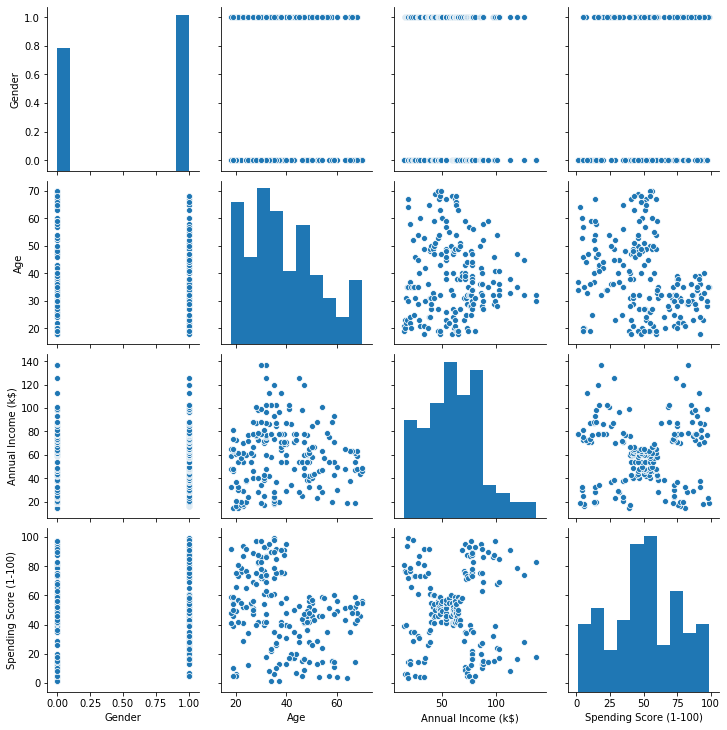

In [160]:
sns.pairplot(data = df)
plt.show

우선 pairplot으로 전체적인 변수들의 분포를 본다. 성비의 경우, 여성이 좀 더 많은 것으로 보인다. 또한 변수들간의 산점도를 보면 대체로 선형관계를 가지진 않지만, 특이한 분포가 있는 것을 볼 수 있다.

<function matplotlib.pyplot.show(*args, **kw)>

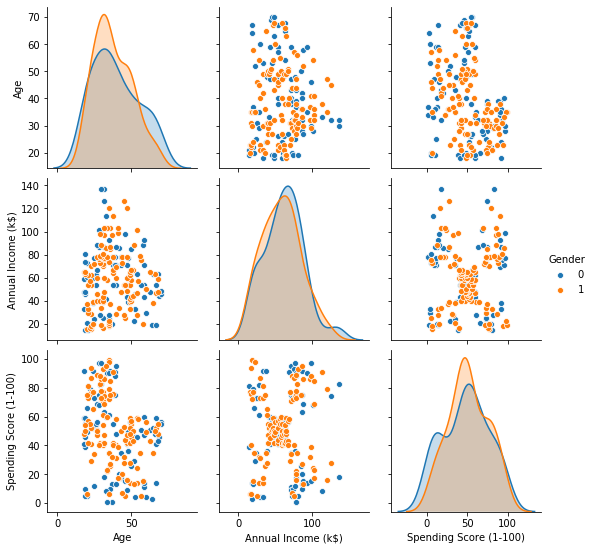

In [161]:
sns.pairplot(data = df, hue = 'Gender')
plt.show

여성과 남성의 경우, 데이터 분포가 다를 수도 있다는 가정에서 출발한다. 하지만 남자와 여자로 분류해서 분포를 봤을 때, 큰 차이가 없는 것을 알 수 있다.

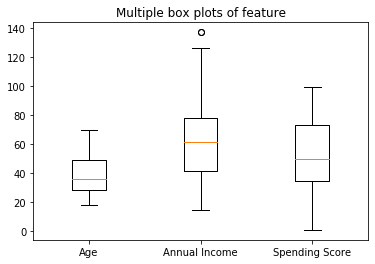

In [162]:
fig, ax = plt.subplots()
ax.boxplot([df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)']])
plt.title('Multiple box plots of feature')
plt.xticks([1, 2, 3], ['Age','Annual Income','Spending Score'])
plt.show()

상자 그림을 통해, 전반적인 분포와 최대 최소값을 파악해본다. 처음에 봤던 것과 마찬가지로 최대, 최소값이 맞지 않음을 파악할 수 있다. 데이터 전처리가 필요하다고 판단했다.

# Scaling

In [163]:
# min max 값의 차이가 서로 크므로 scaling을 진행한다.
from sklearn.preprocessing import StandardScaler

gender의 경우, scaling을 진행하게 되면, 더 이상 unique값이 0과 1로 나오지 않으므로 따로 빼둔다. 그리고 scaling이 완성된 뒤, 하나의 데이터 프레임으로 합쳐주기로 하자.

In [164]:
df_gender = df['Gender']

In [165]:
scaler = StandardScaler()
scale_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
scale_df = scale_df.drop(['Gender'],axis = 1)
scale_df = pd.concat([scale_df,df_gender],axis = 1)
scale_df

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,1
3,-1.137502,-1.700830,1.040418,1
4,-0.563369,-1.662660,-0.395980,1
...,...,...,...,...
195,-0.276302,2.268791,1.118061,1
196,0.441365,2.497807,-0.861839,1
197,-0.491602,2.497807,0.923953,0
198,-0.491602,2.917671,-1.250054,0


In [166]:
scale_df.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender
count,2.000000e+02,2.000000e+02,2.000000e+02,200.000000
mean,-9.603429e-17,-6.128431e-16,-1.121325e-16,0.560000
std,1.002509e+00,1.002509e+00,1.002509e+00,0.497633
min,-1.496335e+00,-1.738999e+00,-1.910021e+00,0.000000
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01,0.000000
50%,-2.045351e-01,3.587926e-02,-7.764312e-03,1.000000
75%,7.284319e-01,6.656748e-01,8.851316e-01,1.000000
max,2.235532e+00,2.917671e+00,1.894492e+00,1.000000


In [167]:
scale_df['Gender'].unique()

array([0, 1], dtype=uint8)

이전 데이터보다 비교적 min,max가 잘 맞는 것을 볼 수 있다. 또한 gender값 역시 0과 1로 맞춰짐을 확인했다.

# Hierarchical Clustering

https://subinium.github.io/MLwithPython-3-5/  
https://woolulu.tistory.com/48#footnote_link_48_1

우선 hierarchical clustering을 진행했다. 이 방식은 가까운 개체들부터 하나하나 cluster를 형성해 가는 방식으로 사전에 클러스터를 제어하지 않아도 된다.

거리 측정 방식은 ward를 사용했다. 3차원 이상의 데이터이다보니, 거리 측정시 날아가는 데이터의 손실 차이가 중요하다고 생각했기 때문이다. 아래와 같이 dendrogram 함수를 사용해서 그래프를 그렸다.

ax의 경우, 현재 축에 대한 정보이다. bound는 x축에 대한 것만 받은 것이다. 직선의 경우, []을 통해 처음과 끝의 y값을 설정해줬다.

이를 통해 얻은 덴드로그램은 아래와 같다.

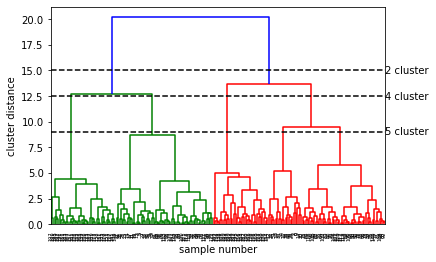

In [168]:
from scipy.cluster.hierarchy import linkage, dendrogram,ward
linkage_array = ward(scale_df)
dendrogram(linkage_array)

ax = plt.gca()
bound = ax.get_xbound()
ax.plot(bound, [15, 15], linestyle = '--',c='k')
ax.plot(bound, [12.5, 12.5], linestyle = '--',c='k')
ax.plot(bound, [9, 9], linestyle = '--',c='k')
ax.text(bound[1], 15, '2 cluster', va = 'center')
ax.text(bound[1], 12.5, '4 cluster', va = 'center')
ax.text(bound[1], 9, '5 cluster', va = 'center')
plt.ylabel('cluster distance')
plt.xlabel('sample number')
plt.show()

cluster distance를 조절하면 cluster의 개수를 조절할 수 있는데 최소 2개에서 6개까지의 클러스터가 가장 적절하다고 생각했다. 그보다 더 낮아지면 클러스터 간의 거리가 너무 가깝다고 생각했다.

In [169]:
feature = scale_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]

아래는 덴드로그램을 사용하지 않고 계층적 군집화의 하나인 병합 군집을 진행하는 방법이다.

In [170]:
from sklearn.cluster import AgglomerativeClustering

In [171]:
agg = AgglomerativeClustering(n_clusters=2) 
pred = pd.DataFrame(agg.fit_predict(feature))
pred.columns = ['predict']

df_new = pd.concat([feature, pred],axis=1)
df_new.head()



,Age,Annual Income (k$),Spending Score (1-100),Gender,predict
0,-1.424569,-1.738999,-0.434801,0,0
1,-1.281035,-1.738999,1.195704,0,1
2,-1.352802,-1.700830,-1.715913,1,0
3,-1.137502,-1.700830,1.040418,1,1
4,-0.563369,-1.662660,-0.395980,1,0


우선 클러스터의 개수를 2개라고 설정했다. 위와 같이 모델을 불러오고, 이 모델에 데이터를 fit해 예측값을 구한다. 그리고 feature데이터와 그 예측값을 하나의 데이터 프레임으로 만든다.

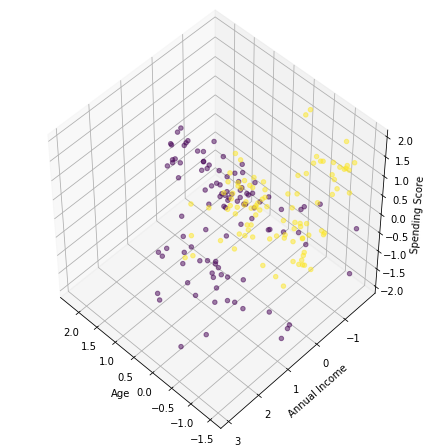

In [172]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(df_new['Age'],df_new['Annual Income (k$)'], df_new['Spending Score (1-100)'], c = df_new['predict'],alpha = 0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

그리고 위와 같은 방법을 통해 3D 그래프를 만들 수 있다.scatter 함수에 순서대로 x,y,z 축을 설쟁해주고, predict값을 뿌려준다. 결과는 위와 같다. 이를 반복해서 확인하는 것이 중요하다.

반복을 위해 아래와 같이 함수를 만들었다. n은 위의 덴드로그램을 참조해서 최소 2개부터 최대 6개까지로 설정했다. 만들어진 산점도는 아래와 같다.

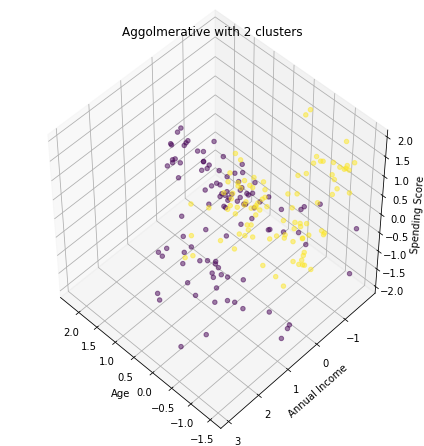

Silhouette Score:  0.29230406706265116


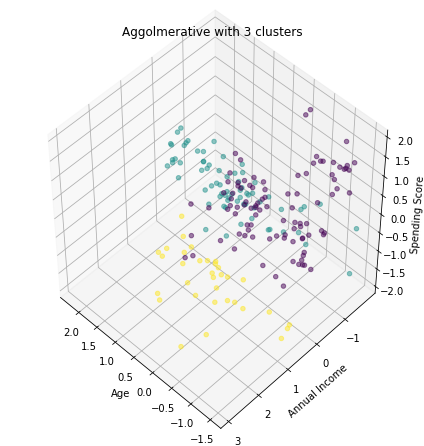

Silhouette Score:  0.30972453727559257


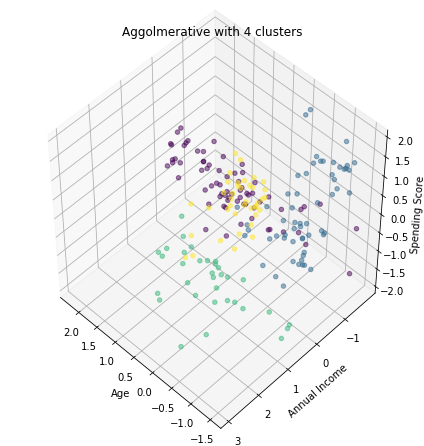

Silhouette Score:  0.3299052543211478


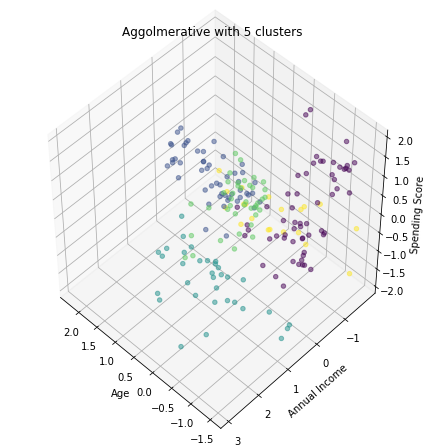

Silhouette Score:  0.3477559149875168


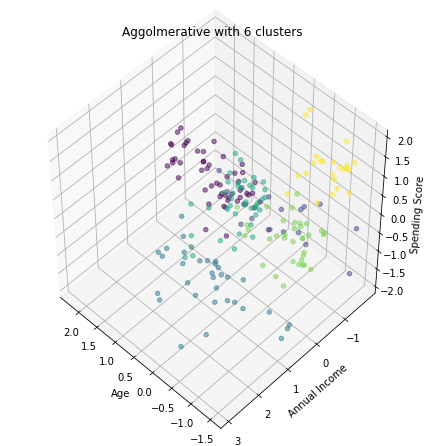

Silhouette Score:  0.3504439354681972


In [173]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.cluster import silhouette_score

n = [2,3,4,5,6]

for i in n:
    agg = AgglomerativeClustering(n_clusters=i) # 계층적 군집화 모델
    pred = pd.DataFrame(agg.fit_predict(feature))# 모델 X에 적용해서 클러스터 예측하기
    pred.columns = ['predict']

    df_new = pd.concat([feature, pred],axis=1)
    df_new.head()

    fig = plt.figure(figsize = (6,6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(df_new['Age'],df_new['Annual Income (k$)'], df_new['Spending Score (1-100)'], c = df_new['predict'],alpha = 0.5)
    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income')
    ax.set_zlabel('Spending Score')
    plt.title('Aggolmerative with {} clusters'.format(i))
    plt.show()
    
    print('Silhouette Score: ',(silhouette_score(feature, pred)))

모델을 평가하는 요소인 실루엣 스코어는 6개일 때, 가장 높은 것으로 판단된다. 그러나 산점도를 봤을 때, 클러스터가 5개일 때 가장 안정적으로 보인다. 개개인에 따라 5~6개 정도로 설정하면 괜찮을 것 같다.

하지만 실루엣 스코어는 절대적인 지표가 아니므로 판단에 있어서 유의해야 한다.

# K-means Clustering

동일한 군집에 속하는 데이터는 어떤 중심을 기준으로 분포할 것이다라는 가정에 기반해서 진행하는 clustering 방법이다. 가장 중요한 점은 초기 군집 중심점을 설정해줘야 하고, 군집의 개수를 조절해줘야 한다는 점이다. 우선 아래와 같은 방식으로 모델링을 진행한다.

In [174]:
from sklearn.cluster import KMeans

In [175]:
#임의로 cluster의 개수를 3으로 지정했다.
kc = KMeans(n_clusters = 3, algorithm = 'auto')
kc.fit(feature)

predict = pd.DataFrame(kc.predict(feature))
predict.columns = ['predict']

df_k = pd.concat([feature,predict],axis=1)
df_k.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender,predict
0,-1.424569,-1.738999,-0.434801,0,1
1,-1.281035,-1.738999,1.195704,0,1
2,-1.352802,-1.700830,-1.715913,1,1
3,-1.137502,-1.700830,1.040418,1,1
4,-0.563369,-1.662660,-0.395980,1,1


모델을 만드는 방식은 위와 같다. 하지만 적절한 군집의 개수를 찾기 위해서는 elbow point를 찾아야 한다. 찾는 방식은 아래와 같다. 가장 꺾이는 지점은 2.5와 5 사이의 값으로 3,4,5 중 하나로 판단된다. 이를 바탕으로 위에서 했던 것과 같이 3D산점도를 반복해서 진행한다.

Text(0.5, 1.0, 'Elbow curve')

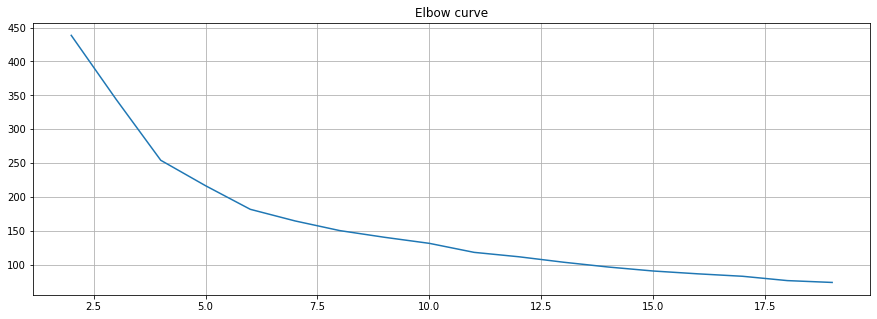

In [176]:
distorsions = []
    
for k in range(2,20):
    kc = KMeans(n_clusters = k)
    kc.fit(feature)
    distorsions.append(kc.inertia_)
    
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

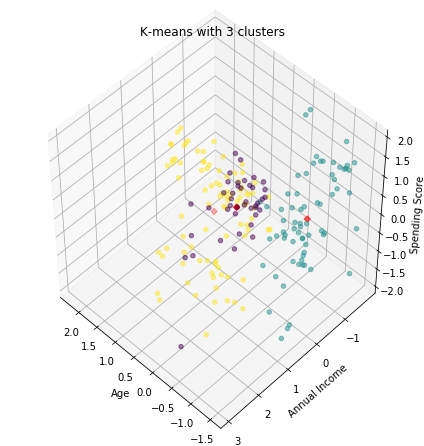

Silhouette Score:  0.3142800845203407


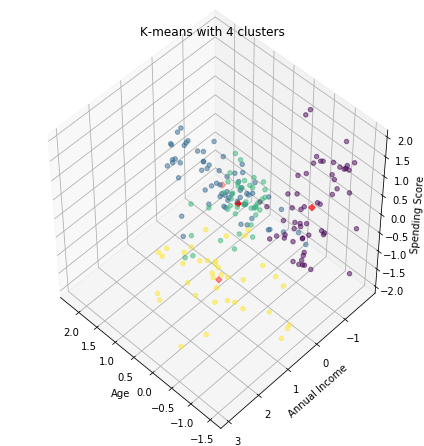

Silhouette Score:  0.35027020434653977


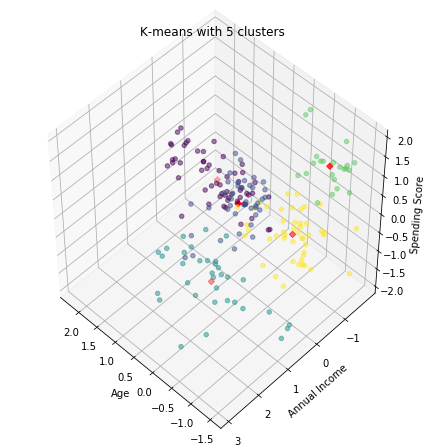

Silhouette Score:  0.34977050035201074


In [177]:

n = [3,4,5]

for i in n:
    kc = KMeans(n_clusters = i, algorithm = 'auto')
    kc.fit(feature)
    predict = pd.DataFrame(kc.predict(feature))
    predict.columns = ['predict']

    df_k = pd.concat([feature,predict],axis=1)
    df_k.head()

    centers = pd.DataFrame(kc.cluster_centers_,columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender'])
    center_x = centers['Age']
    center_y = centers['Annual Income (k$)']
    center_z = centers['Spending Score (1-100)']

    fig = plt.figure(figsize = (6,6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(df_k['Age'],df_k['Annual Income (k$)'], df_k['Spending Score (1-100)'], c = df_k['predict'],alpha = 0.5)
    ax.scatter(center_x,center_y,center_z,marker='D',c='r')
    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income')
    ax.set_zlabel('Spending Score')
    plt.title ('K-means with {} clusters'.format(i))
    plt.show()
    
    print('Silhouette Score: ',(silhouette_score(feature, predict)))

elbow point로 미루어 판단했을 때와 마찬가지로 실루엣 스코어도 cluster가 4개 일 때, 가장 높은 값을 가졌다.

# DBSCAN

DBSCAN은 밀도 기반 군집화 방법으로 동일한 군집에 속하는 데이터는 서로 근접하게 위치해 있을 것이라는 가정에서 출발한다.

이 방법에서 중요한 하이퍼 파라미터는 eps로 원의 반지름과 sample의 개수이다. 여기서는 sample의 개수를 3개로 고정시키고 eps만을 조정해봤다. 결과는 아래의 그래프들과 같다.

In [178]:
from sklearn.cluster import DBSCAN

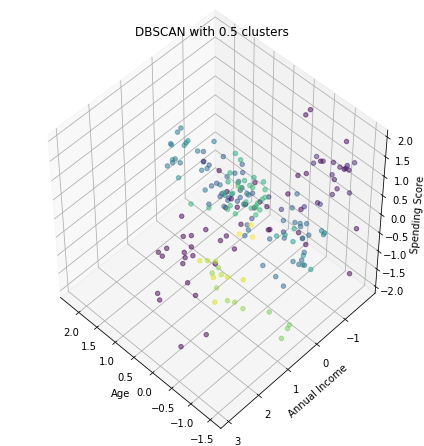

Silhouette Score:  0.14325365878508312


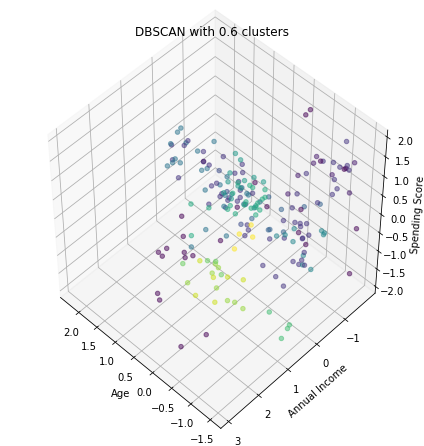

Silhouette Score:  0.11305474739948394


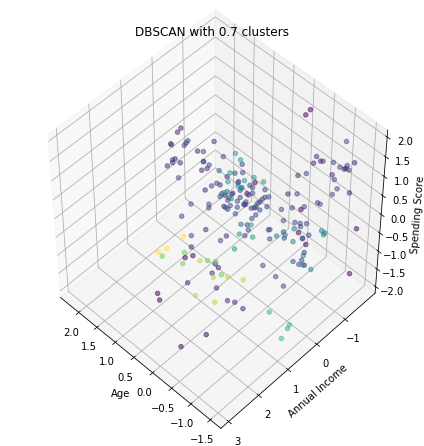

Silhouette Score:  -0.02149665923617635


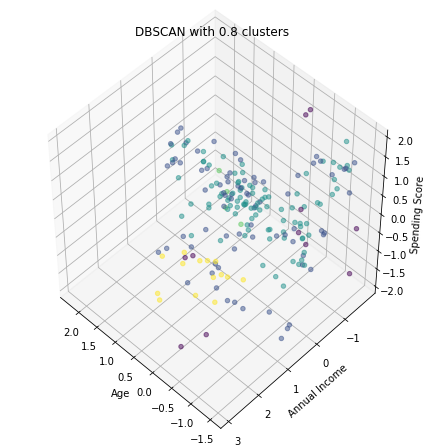

Silhouette Score:  0.05776167461533666


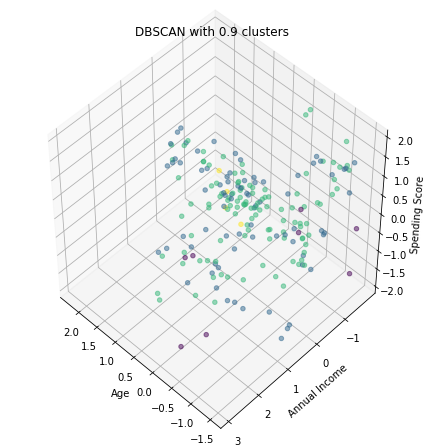

Silhouette Score:  0.0682303484568711


In [179]:
eps = [0.5, 0.6, 0.7, 0.8, 0.9]

for i in eps:
    db = DBSCAN(eps=i, min_samples=3)
    predict2 = pd.DataFrame(db.fit_predict(feature))
    predict2.columns = ['predict']

    df_db = pd.concat([feature,predict2],axis=1) 
    
    fig = plt.figure(figsize = (6,6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(df_db['Age'],df_db['Annual Income (k$)'], df_db['Spending Score (1-100)'], c = df_db['predict'],alpha = 0.5)
    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income')
    ax.set_zlabel('Spending Score')
    plt.title('DBSCAN with {} clusters'.format(i))
    plt.show()
    
    print('Silhouette Score: ',(silhouette_score(feature, predict2)))

실루엣 스코어가 굉장히 처참한 수준으로 나왔다. 그나마 높은 값은 약 0.14로 sample이 3개 일 때, 반지름은 0.5일 때 이다. 물론 반지름을 더 넓게 잡아도 되지만 scaling을 통해 데이터를 전처리 했으므로 너무 넓은 것도 전혀 도움이 되지 않는다.

그러나 이는 믿을만한 정보는 못된다. 모양이 매우 복잡해 실루엣 값과는 상관이 없을 수도 있기 때문이다. 따라서 실루엣 스코어만 가지고 판단할 때는 굉장히 조심스러워야 한다.

# Mean Shift Clustering

https://towardsdatascience.com/machine-learning-algorithms-part-13-mean-shift-clustering-example-in-python-4d6452720b00  
https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_clustering_algorithms_mean_shift.htm

Mean-shift Clustering이란 목표가 그룹이나 클래스의 center points를 찾아가는 알고리즘에 기반하여 만들어진 방법이다. 이를 계속 반복함으로써 center points 후보를 계속해서 업데이트 한다. 그러면 포인트는 더 높은 밀도를 갖는 지역으로 옮겨지게 되는 것이다.

코드는 아래와 같다. k를 설정해줌으로써 for 문을 통해 하이퍼 파라미터 튜닝을 진행한다. 10부터 25로 지정한 이유는 너무 작으면 bandwidth 값에 오류가 발생하고, 너무 크면 실루엣 스코어를 구하지 못하기 때문이다.

이 때 bandwidth란 대역폭으로 얼마나 포괄할지를 정하는 기준이다.

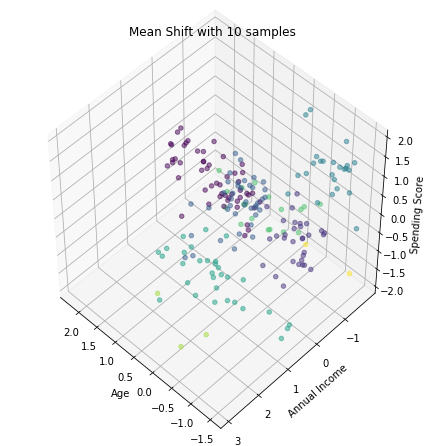

Silhouette Score:  0.32502137748495685


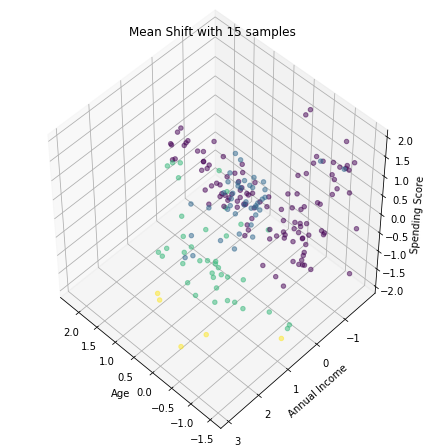

Silhouette Score:  0.1948407306889015


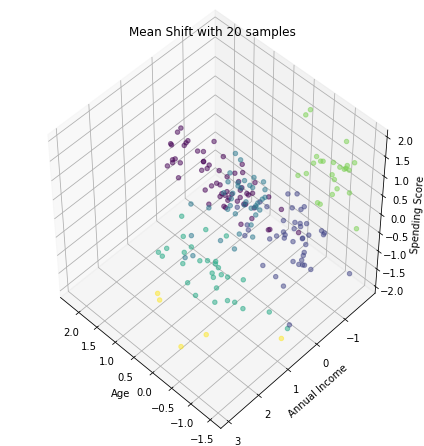

Silhouette Score:  0.32297405611058394


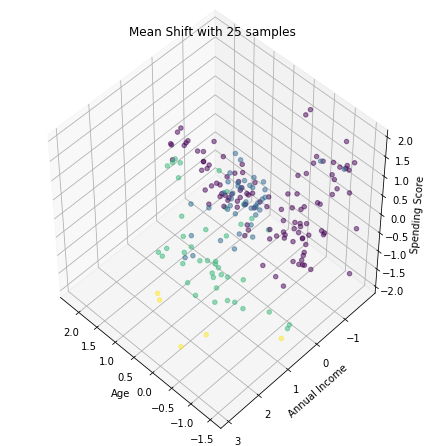

Silhouette Score:  0.1919328337899842


In [180]:
from sklearn.cluster import MeanShift, estimate_bandwidth

k = [10, 15, 20, 25]

for i in k:
    
    bandwidth = estimate_bandwidth(feature,quantile = 0.2, n_samples = i)
    ms = MeanShift(bandwidth = bandwidth)
    predict3 = pd.DataFrame(ms.fit_predict(feature))
    predict3.columns = ['predict']
    df_Ms = pd.concat([feature, predict3], axis=1)

    fig = plt.figure(figsize = (6,6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(df_Ms['Age'],df_Ms['Annual Income (k$)'], df_Ms['Spending Score (1-100)'], c = df_Ms['predict'],alpha = 0.5)
    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income')
    ax.set_zlabel('Spending Score')
    plt.title('Mean Shift with {} samples'.format(i))
    plt.show()
   
    print('Silhouette Score: ',(silhouette_score(feature, predict3)))

결과는 위와 같이 나왔으며 실루엣 스코어의 경우, n이 10이나 20일 때 그래도 의미있게 나온 것을 확인할 수 있었다.

개인적으로 좀 더 정확한 분석을 위해서 차원을 줄여서 2차원의 x,y축 그래프에 산점도를 찍으면 더 좋았을 것 같다.